<a href="https://colab.research.google.com/github/JuanDaMantilla/CIENCIAS_DATOS/blob/main/Analis%C3%ADs_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd #manipulacion y analisis de datos
import numpy as np #calculos matematicos
from scipy.stats import trim_mean #estadistica
from statsmodels import robust
import seaborn as sns #graficas bonitas
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [2]:

data=pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
data.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
data.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [4]:
data.sample()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2085,Female,25.986368,1.668951,112.249699,yes,yes,3.0,3.0,Sometimes,no,2.930137,no,0.043101,0.138629,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [7]:
file_path = '/content/ObesityDataSet_raw_and_data_sinthetic.csv'
data = pd.read_csv(file_path)

# Eliminar duplicados
data = data.drop_duplicates()

# Obtener solo las columnas de tipo flotante
float_columns = data.select_dtypes(include=['float64'])

# Obtener una descripción general solo de las columnas flotantes
float_description = float_columns.describe()

# Mostrar valores típicos de las características flotantes
print("Valores típicos de las características flotantes:\n")
for column in float_description.columns:
    print(f"Feature: {column}")
    print(f"  Tipo: {data[column].dtype}")
    print(f"  Valores típicos:\n{float_description[column]}\n")

# Agrupar y contar variables que no son flotantes
non_float_columns = data.select_dtypes(exclude=['float64']).columns

for column in non_float_columns:
    count = data.groupby(column).size().reset_index(name='Count')
    print(f"Conteo de registros para la feature '{column}':\n")
    print(count)
    print("\n" + "="*50 + "\n")  # Separador entre resultados

Valores típicos de las características flotantes:

Feature: Age
  Tipo: float64
  Valores típicos:
count    2087.000000
mean       24.353090
std         6.368801
min        14.000000
25%        19.915937
50%        22.847618
75%        26.000000
max        61.000000
Name: Age, dtype: float64

Feature: Height
  Tipo: float64
  Valores típicos:
count    2087.000000
mean        1.702674
std         0.093186
min         1.450000
25%         1.630178
50%         1.701584
75%         1.769491
max         1.980000
Name: Height, dtype: float64

Feature: Weight
  Tipo: float64
  Valores típicos:
count    2087.000000
mean       86.858730
std        26.190847
min        39.000000
25%        66.000000
50%        83.101100
75%       108.015907
max       173.000000
Name: Weight, dtype: float64

Feature: FCVC
  Tipo: float64
  Valores típicos:
count    2087.000000
mean        2.421466
std         0.534737
min         1.000000
25%         2.000000
50%         2.396265
75%         3.000000
max         

In [8]:
#encontrar valores perdidos
valores_perdidos=data.isnull().sum()
print(valores_perdidos)

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [9]:
#valores duplicados
duplicate_rows=data.duplicated().sum()
print(duplicate_rows)

0


In [10]:
#eliminar datos duplicados
data_cleaned = data.drop_duplicates()
print(data_cleaned)

      Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE  

In [11]:
#identificacion de NaN
print(data.isna())

      Gender    Age  Height  Weight  family_history_with_overweight   FAVC  \
0      False  False   False   False                           False  False   
1      False  False   False   False                           False  False   
2      False  False   False   False                           False  False   
3      False  False   False   False                           False  False   
4      False  False   False   False                           False  False   
...      ...    ...     ...     ...                             ...    ...   
2106   False  False   False   False                           False  False   
2107   False  False   False   False                           False  False   
2108   False  False   False   False                           False  False   
2109   False  False   False   False                           False  False   
2110   False  False   False   False                           False  False   

       FCVC    NCP   CAEC  SMOKE   CH2O    SCC    FAF    TUE   

In [12]:
#valores infinitos
data.isin([np.inf, -np.inf]).sum()
print(data)

      Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE  

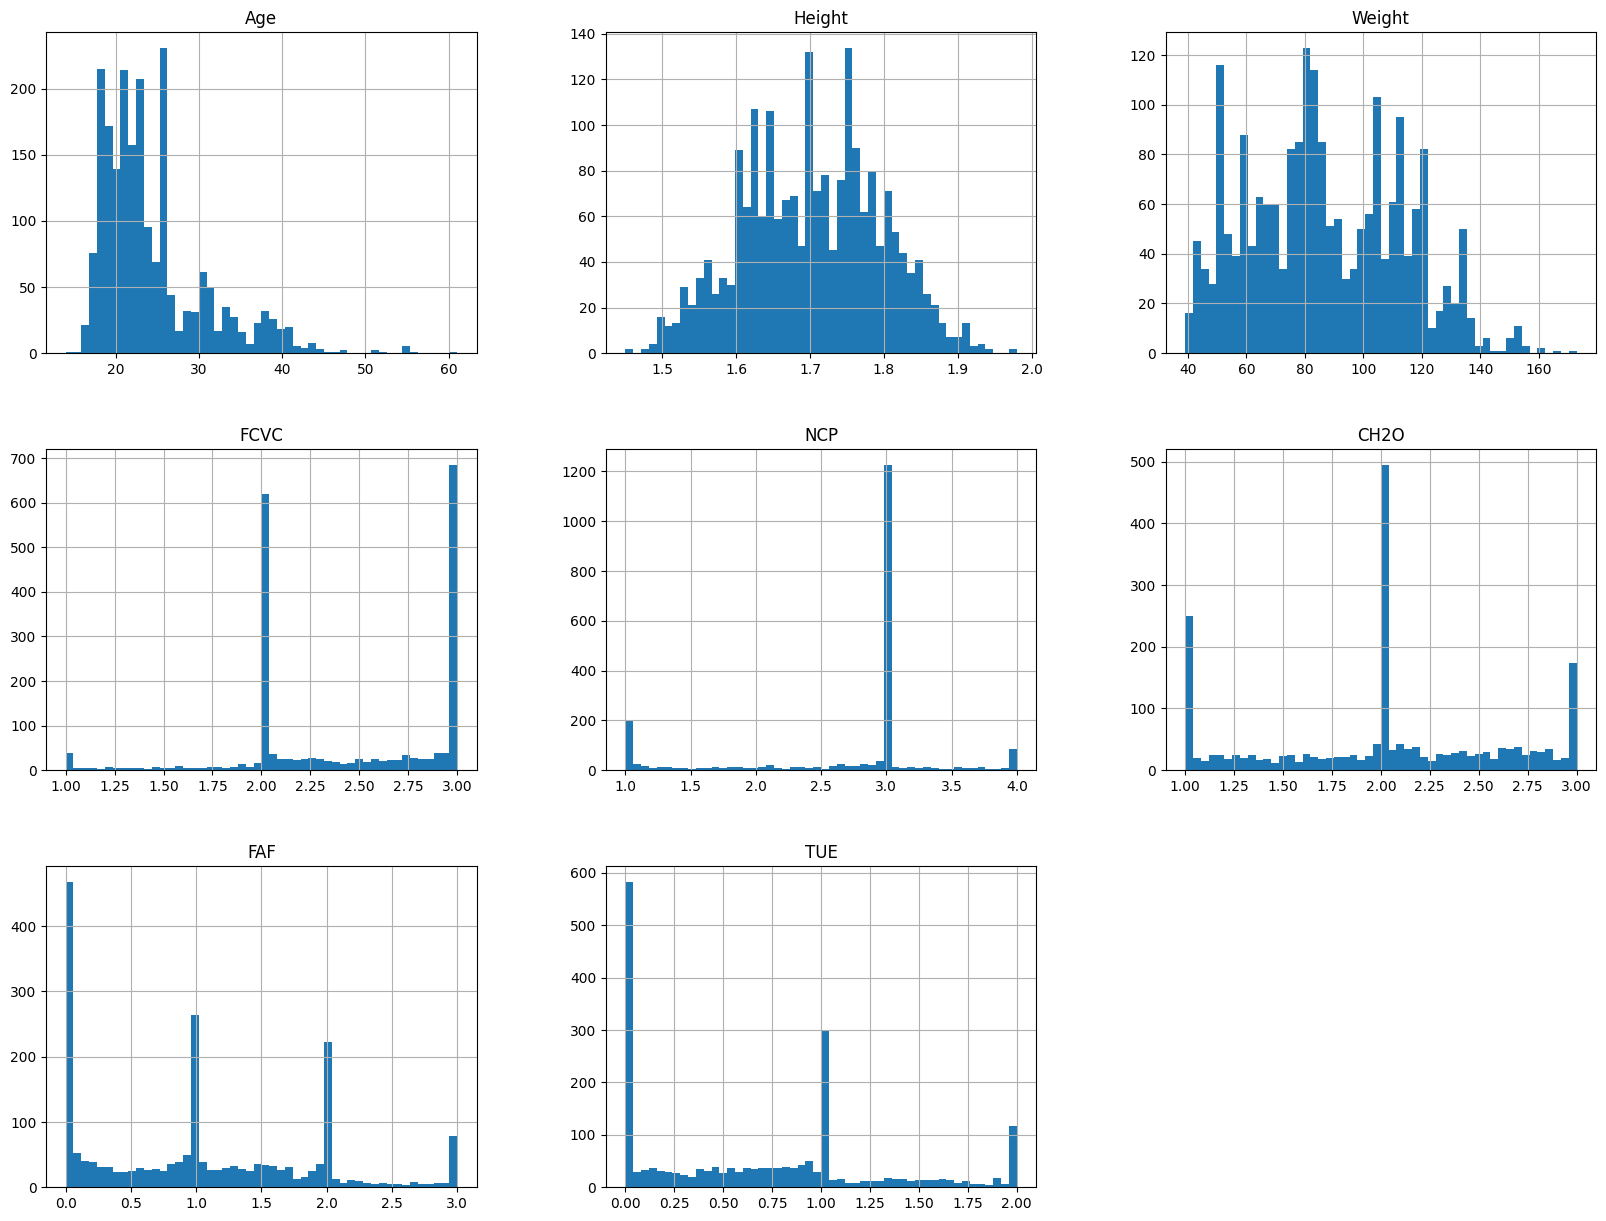

In [13]:
#análisis gráfico
data.hist(bins=50, figsize=(20,15))
plt.show()


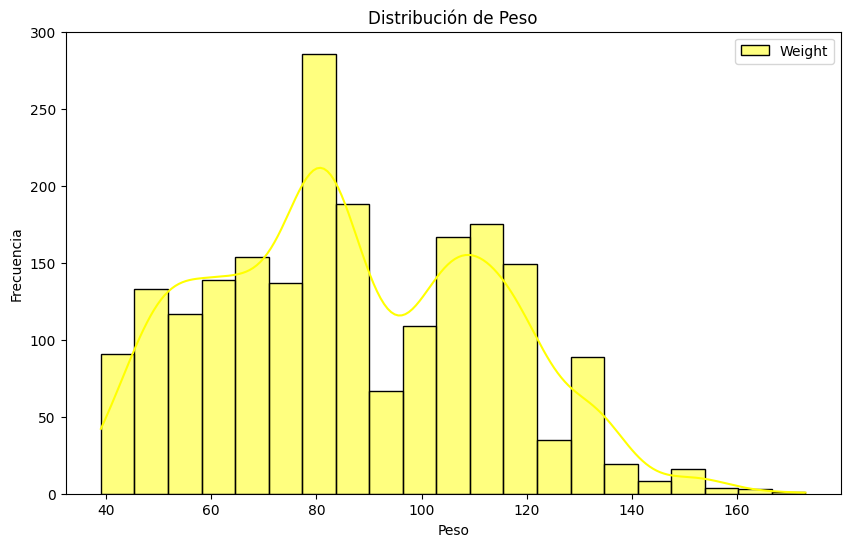

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [14]:

#dibujar distribución ponderada
plt.figure(figsize=(10,6))
sns.histplot(data=data,x="Weight", color="Yellow",kde=True,label="Weight")
plt.title("Distribución de Peso")
plt.xlabel("Peso")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()
plt

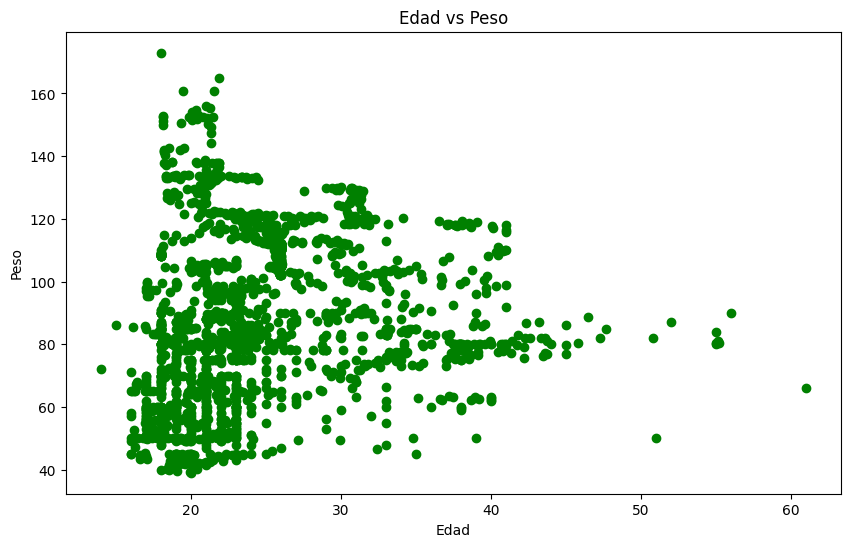

In [15]:

#graficando scatter plot (diagrama de dispercion) para evaluar edad vs peso
fig, ax = plt.subplots(figsize=(10,6)) # Assign the output to fig and ax
ax.scatter(data=data, x="Age", y="Weight", color="green") # Use ax to create the scatter plot
plt.title("Edad vs Peso")
plt.xlabel("Edad")
plt.ylabel("Peso")
plt.show() # Add plt.show() to display the plot

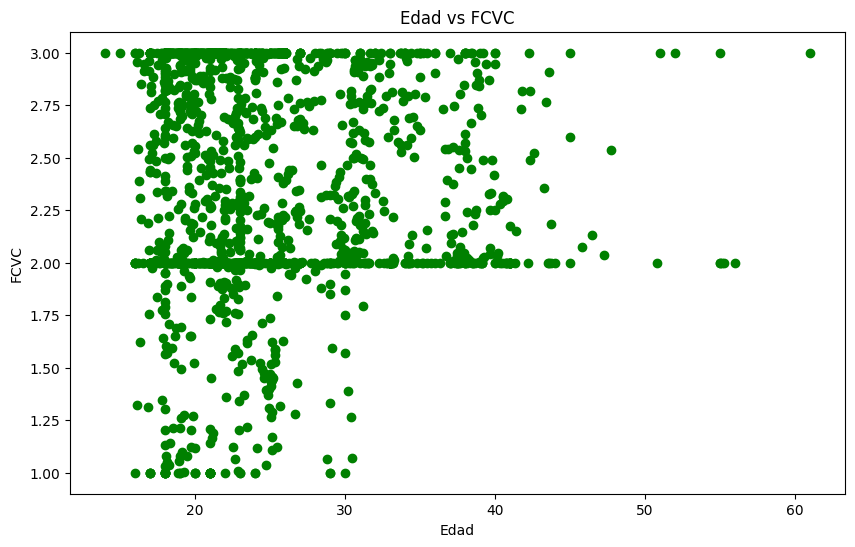

In [16]:
#análisis de dispersion
fig, ax = plt.subplots(figsize=(10,6)) # Assign the output to fig and ax
ax.scatter(data=data, x="Age", y="FCVC", color="green") # Use ax to create the scatter plot
plt.title("Edad vs FCVC")
plt.xlabel("Edad")
plt.ylabel("FCVC")
plt.show() # Add plt.show() to display the plot

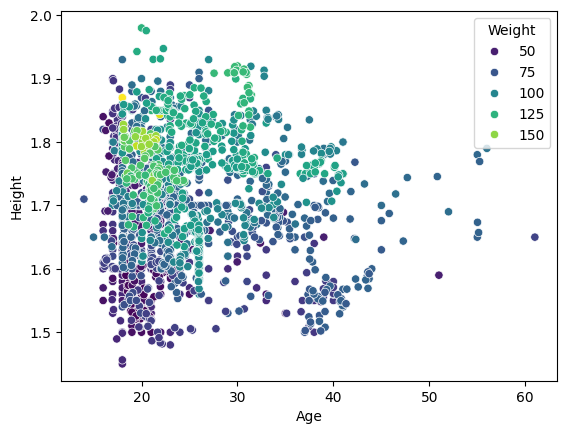

In [17]:
#DIAGRAMA DE DISPERSION ENTRE EDAD VS ESTATURA PARA DIFERENTES PESOS
scatter_plot = sns.scatterplot(data=data, x='Age', y='Height', hue='Weight', palette='viridis')

Text(0.0, 1.0, 'Altura vs Peso')

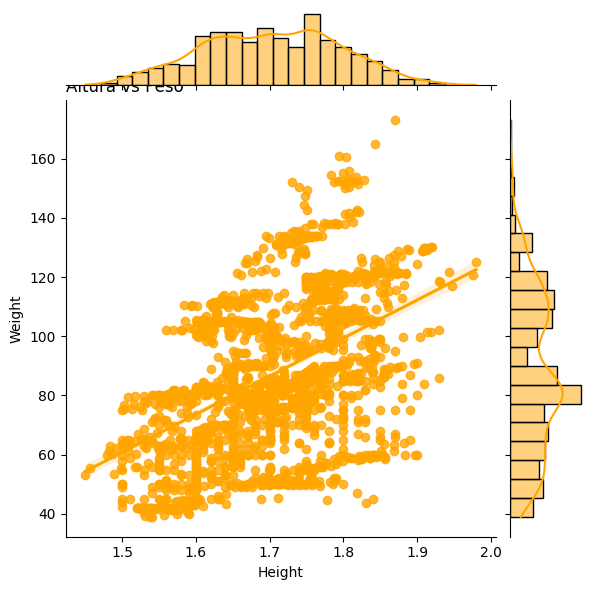

In [18]:
sns.jointplot(data=data, x='Height', y='Weight', kind='reg', color='orange')
plt.title("Altura vs Peso",loc='left')

In [19]:
#ANÁLISIS ENTRE EDAD VS PROMEDIO DE PESO PARA EL TOP 15 DE EDADES
top_15_ages=data.groupby('Age')['Weight'].mean().nlargest(15)
top_15_ages

,Weight
Age,
21.900120,165.057269
19.472190,160.935351
21.521294,160.639405
20.989016,155.872093
21.291969,155.242672
20.327723,154.618446
20.102241,153.959945
20.438478,153.149491
18.112503,152.720545


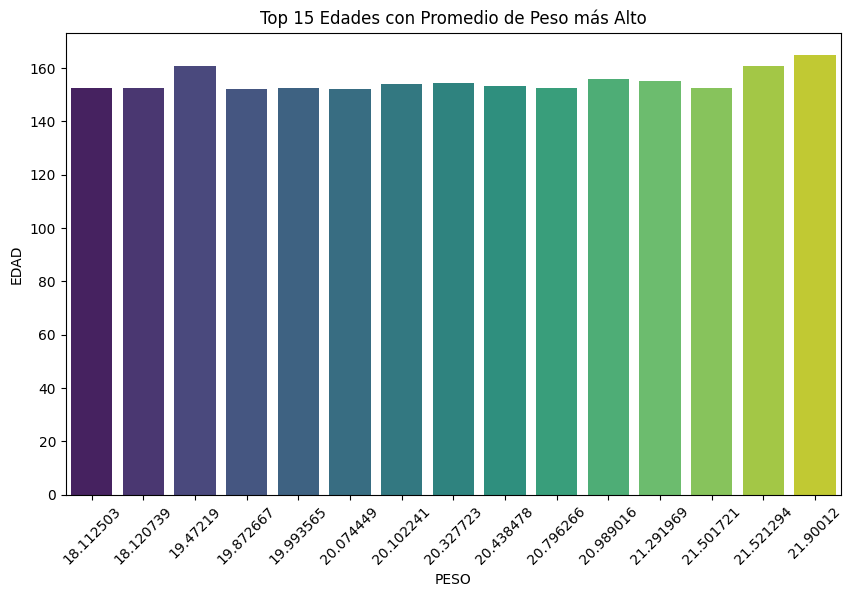

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_15_ages.index, y=top_15_ages.values, palette='viridis') # Changed top_15_edades to top_15_ages
plt.title('Top 15 Edades con Promedio de Peso más Alto')
plt.xlabel('PESO')
plt.ylabel('EDAD')
plt.xticks(rotation=45)
plt.show()

In [23]:
data["CALC"]=data["CALC"].astype("category")
data["CALC"]

,CALC
0,no
1,Sometimes
2,Frequently
3,Frequently
4,Sometimes
...,...
2106,Sometimes
2107,Sometimes
2108,Sometimes
2109,Sometimes


Text(0.5, 1.0, 'Consumo de alcohol por edad')

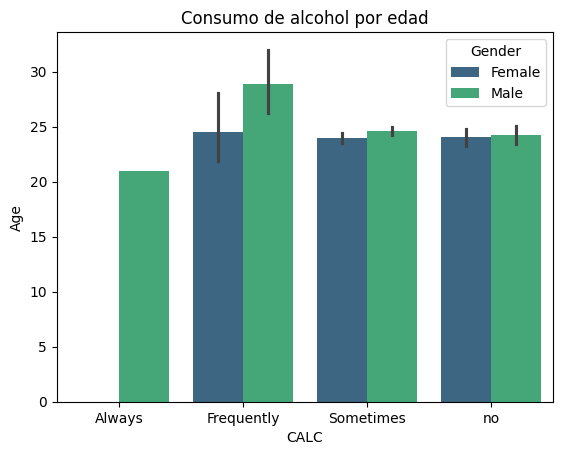

In [24]:
sns.barplot(x=data["CALC"],y=data["Age"],data=data,hue="Gender", palette="viridis")
plt.title("Consumo de alcohol por edad")

Text(0.5, 1.0, '% Consumo de alcohol para hombres y mujeres')

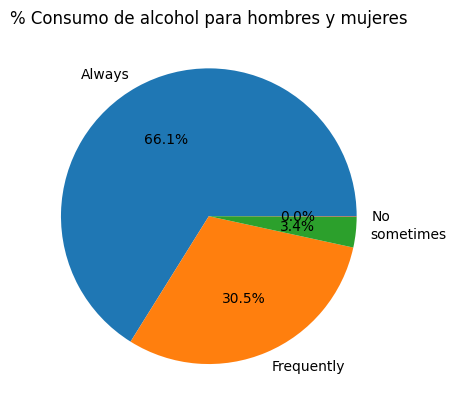

In [25]:
#diagrama de torta para ver el % de consumo de alcohol
count=data["CALC"].value_counts()
labels=["Always", "Frequently", "sometimes", "No"]
vals= count.values
plt.pie(vals,labels=labels,autopct="%1.1f%%")
plt.title("% Consumo de alcohol para hombres y mujeres")

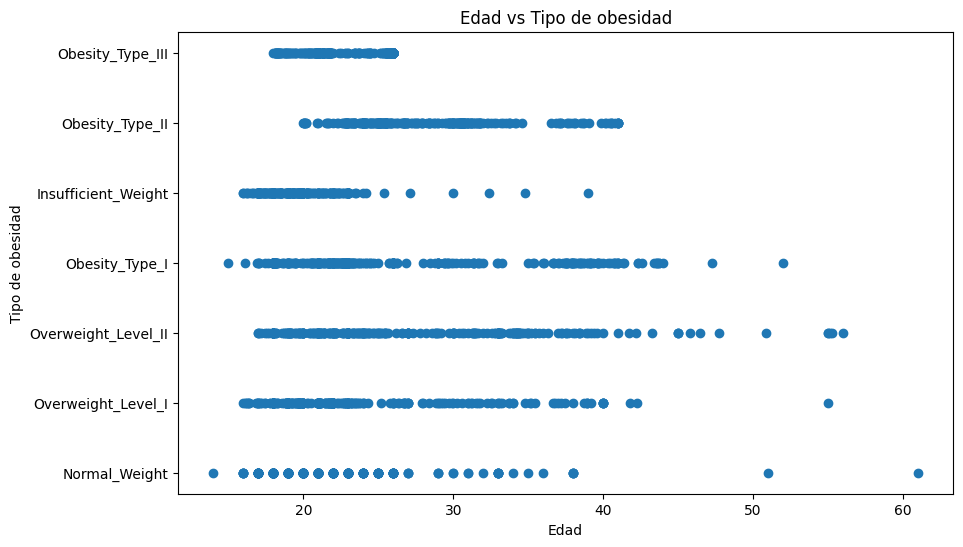

<function matplotlib.pyplot.show(close=None, block=None)>

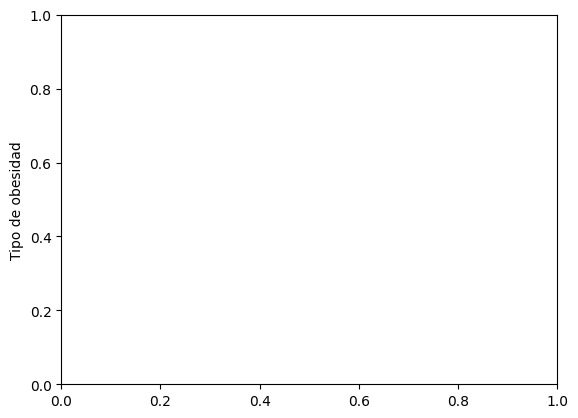

In [26]:
#grafica edad vs tipo de obesidad usando diagrama de dispersion
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data["Age"], data["NObeyesdad"])
plt.title("Edad vs Tipo de obesidad")
plt.xlabel("Edad")
plt.ylabel("Tipo de obesidad")
plt.show()
plt.ylabel("Tipo de obesidad")
plt.show
